# 연령판정과 누적관람객수의 관계

In [1]:
import numpy as np
import pandas as pd

In [2]:
sample1 = pd.read_csv("C:\\GitTest\\10M_Movie\\analysis\\movie_info_final3.csv")
sample1

,영화,개봉일,장르,영상등급,제작국가,스크린타입,감독,주연,누적관객수
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919
1,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338
2,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658
3,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602
...,...,...,...,...,...,...,...,...,...
195,신의 한 수,2014-07-03,"범죄,액션",청소년관람불가,한국,"필름,2D",조범구,"정우성,안성기,이범수,김인권,이시영,안길강,최진혁",3566852
196,코코,2018-01-11,애니메이션,전체관람가,미국,"2D,4D,IMAX",리 언크리치,"가엘 가르시아 베르날,앤서니 곤잘레스,벤자민 브랫",3516880
197,해리 포터와 불의 잔,2005-12-01,"액션,판타지",12세이상관람가,미국,"필름,4D",마이크 뉴웰,"다니엘 래드클리프,루퍼트 그린트,엠마 왓슨,랄프 파인즈",3499257
198,비긴 어게인,2014-08-13,멜로/로맨스,15세이상관람가,미국,"필름,2D",존 카니,"키이라 나이틀리,마크 러팔로,애덤 리바인,헤일리 스테인펠드,제임스 코든,캐서린 키너",3477672


In [9]:
# del sample1["Unnamed: 0"]

In [3]:
sample1['영상등급'].value_counts()

12세이상관람가    88
15세이상관람가    80
전체관람가       17
청소년관람불가     15
Name: 영상등급, dtype: int64

In [4]:
director_age_avg = sample1.groupby(by="영상등급").mean()
director_age_avg = director_age_avg.astype(int)
director_age_avg.sort_values("누적관객수", ascending = False)

,누적관객수
영상등급,
15세이상관람가,6817224
12세이상관람가,6498483
전체관람가,5832964
청소년관람불가,5029335


### 각 연령판정 별 평균관람객수 컬럼 추가

In [5]:
sample2 = pd.merge(sample1, director_age_avg, on = "영상등급")

In [6]:
sample2
sample2.index = range(1, len(sample2) + 1)
sample2

,영화,개봉일,장르,영상등급,제작국가,스크린타입,감독,주연,누적관객수_x,누적관객수_y
1,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919,6817224
2,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338,6817224
3,베테랑,2015-08-05,"액션,드라마",15세이상관람가,한국,"필름,2D",류승완,"황정민,유아인,유해진,오달수",13414484,6817224
4,도둑들,2012-07-25,"액션,범죄",15세이상관람가,"한국,홍콩","필름,2D",최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상",12984701,6817224
5,7번방의 선물,2013-01-23,"코미디,드라마",15세이상관람가,한국,"필름,2D",이환경,"류승룡,박신혜,갈소원,오달수,박원상,김정태,정만식,김기천",12812144,6817224
...,...,...,...,...,...,...,...,...,...,...
196,아가씨,2016-06-01,"스릴러,드라마",청소년관람불가,한국,2D,박찬욱,"김민희,김태리,하정우,조진웅",4300365,5029335
197,타짜-신의 손,2014-09-03,드라마,청소년관람불가,한국,"필름,2D",강형철,"최승현,신세경,곽도원,유해진,김윤석,이하늬,김인권,이경영,고수희,오정세",4018341,5029335
198,데드풀 2,2018-05-16,"액션,어드벤처,코미디,SF",청소년관람불가,미국,"2D,4D,IMAX",데이빗 레이치,"라이언 레이놀즈,조슈 브롤린,재지 비츠,모레나 바카린,브리아나 힐데브란드",3784602,5029335
199,쌍화점,2008-12-30,드라마,청소년관람불가,한국,"필름,2D",유하,"조인성,주진모,송지효,임주환,여욱환",3749034,5029335


In [7]:
sample2.rename(columns={'누적관객수_x': '누적관객수'}, inplace=True)
sample2.rename(columns={'누적관객수_y': '등급별평균관객수'}, inplace=True)

In [8]:
sample2

,영화,개봉일,장르,영상등급,제작국가,스크린타입,감독,주연,누적관객수,등급별평균관객수
1,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919,6817224
2,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338,6817224
3,베테랑,2015-08-05,"액션,드라마",15세이상관람가,한국,"필름,2D",류승완,"황정민,유아인,유해진,오달수",13414484,6817224
4,도둑들,2012-07-25,"액션,범죄",15세이상관람가,"한국,홍콩","필름,2D",최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상",12984701,6817224
5,7번방의 선물,2013-01-23,"코미디,드라마",15세이상관람가,한국,"필름,2D",이환경,"류승룡,박신혜,갈소원,오달수,박원상,김정태,정만식,김기천",12812144,6817224
...,...,...,...,...,...,...,...,...,...,...
196,아가씨,2016-06-01,"스릴러,드라마",청소년관람불가,한국,2D,박찬욱,"김민희,김태리,하정우,조진웅",4300365,5029335
197,타짜-신의 손,2014-09-03,드라마,청소년관람불가,한국,"필름,2D",강형철,"최승현,신세경,곽도원,유해진,김윤석,이하늬,김인권,이경영,고수희,오정세",4018341,5029335
198,데드풀 2,2018-05-16,"액션,어드벤처,코미디,SF",청소년관람불가,미국,"2D,4D,IMAX",데이빗 레이치,"라이언 레이놀즈,조슈 브롤린,재지 비츠,모레나 바카린,브리아나 힐데브란드",3784602,5029335
199,쌍화점,2008-12-30,드라마,청소년관람불가,한국,"필름,2D",유하,"조인성,주진모,송지효,임주환,여욱환",3749034,5029335


In [9]:
sample2.index = range(1, len(sample2) + 1)

In [10]:
sample2 = sample2.sort_values("누적관객수", ascending = False)
sample2

,영화,개봉일,장르,영상등급,제작국가,스크린타입,감독,주연,누적관객수,등급별평균관객수
1,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919,6817224
2,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338,6817224
81,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658,6498483
82,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478,6498483
83,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602,6498483
...,...,...,...,...,...,...,...,...,...,...
200,신의 한 수,2014-07-03,"범죄,액션",청소년관람불가,한국,"필름,2D",조범구,"정우성,안성기,이범수,김인권,이시영,안길강,최진혁",3566852,5029335
185,코코,2018-01-11,애니메이션,전체관람가,미국,"2D,4D,IMAX",리 언크리치,"가엘 가르시아 베르날,앤서니 곤잘레스,벤자민 브랫",3516880,5832964
168,해리 포터와 불의 잔,2005-12-01,"액션,판타지",12세이상관람가,미국,"필름,4D",마이크 뉴웰,"다니엘 래드클리프,루퍼트 그린트,엠마 왓슨,랄프 파인즈",3499257,6498483
79,비긴 어게인,2014-08-13,멜로/로맨스,15세이상관람가,미국,"필름,2D",존 카니,"키이라 나이틀리,마크 러팔로,애덤 리바인,헤일리 스테인펠드,제임스 코든,캐서린 키너",3477672,6817224


In [11]:
sample2

,영화,개봉일,장르,영상등급,제작국가,스크린타입,감독,주연,누적관객수,등급별평균관객수
1,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919,6817224
2,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338,6817224
81,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658,6498483
82,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478,6498483
83,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602,6498483
...,...,...,...,...,...,...,...,...,...,...
200,신의 한 수,2014-07-03,"범죄,액션",청소년관람불가,한국,"필름,2D",조범구,"정우성,안성기,이범수,김인권,이시영,안길강,최진혁",3566852,5029335
185,코코,2018-01-11,애니메이션,전체관람가,미국,"2D,4D,IMAX",리 언크리치,"가엘 가르시아 베르날,앤서니 곤잘레스,벤자민 브랫",3516880,5832964
168,해리 포터와 불의 잔,2005-12-01,"액션,판타지",12세이상관람가,미국,"필름,4D",마이크 뉴웰,"다니엘 래드클리프,루퍼트 그린트,엠마 왓슨,랄프 파인즈",3499257,6498483
79,비긴 어게인,2014-08-13,멜로/로맨스,15세이상관람가,미국,"필름,2D",존 카니,"키이라 나이틀리,마크 러팔로,애덤 리바인,헤일리 스테인펠드,제임스 코든,캐서린 키너",3477672,6817224


In [14]:
sample2.index = range(1, len(sample2) + 1)

In [15]:
sample2

,영화,개봉일,장르,영상등급,제작국가,스크린타입,감독,주연,누적관객수,등급별평균관객수
1,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919,6817224
2,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338,6817224
3,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658,6498483
4,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478,6498483
5,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602,6498483
...,...,...,...,...,...,...,...,...,...,...
196,신의 한 수,2014-07-03,"범죄,액션",청소년관람불가,한국,"필름,2D",조범구,"정우성,안성기,이범수,김인권,이시영,안길강,최진혁",3566852,5029335
197,코코,2018-01-11,애니메이션,전체관람가,미국,"2D,4D,IMAX",리 언크리치,"가엘 가르시아 베르날,앤서니 곤잘레스,벤자민 브랫",3516880,5832964
198,해리 포터와 불의 잔,2005-12-01,"액션,판타지",12세이상관람가,미국,"필름,4D",마이크 뉴웰,"다니엘 래드클리프,루퍼트 그린트,엠마 왓슨,랄프 파인즈",3499257,6498483
199,비긴 어게인,2014-08-13,멜로/로맨스,15세이상관람가,미국,"필름,2D",존 카니,"키이라 나이틀리,마크 러팔로,애덤 리바인,헤일리 스테인펠드,제임스 코든,캐서린 키너",3477672,6817224


### 순위와 연령판정의 산점도

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

Text(0.5, 1.0, '순위와 연령판정의 산점도')

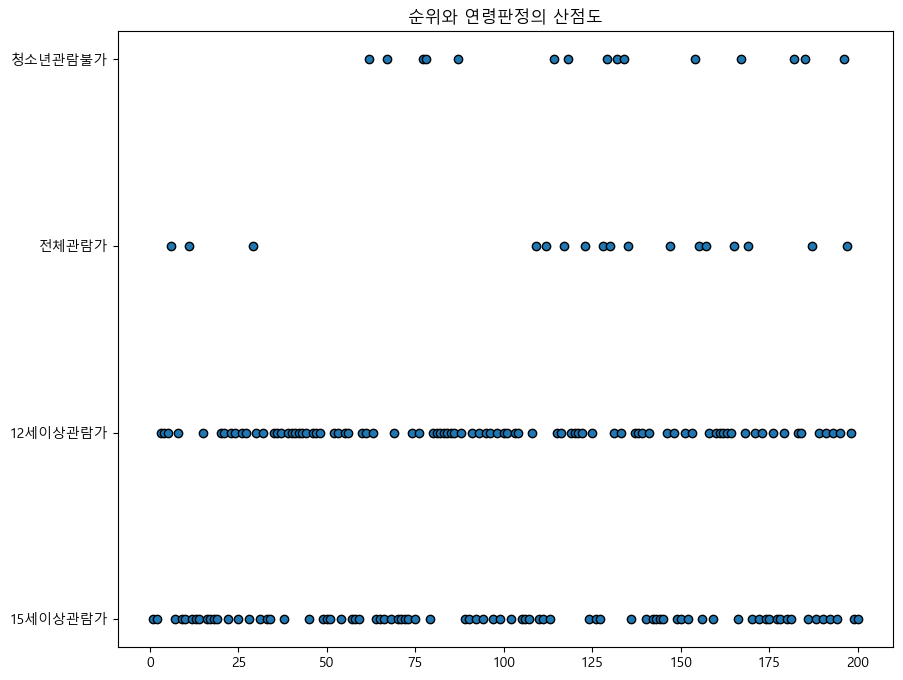

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(sample2.index, sample2["영상등급"], edgecolors='k')
ax.set_title("순위와 연령판정의 산점도")

In [17]:
sample2[sample2["영상등급"] == "청소년관람불가"]

,영화,개봉일,장르,영상등급,제작국가,스크린타입,감독,주연,누적관객수,등급별평균관객수
62,내부자들,2015-11-19,"범죄,드라마",청소년관람불가,한국,"필름,2D",우민호,"이병헌,조승우,백윤식",7073581,5029335
67,범죄도시,2017-10-03,"범죄,액션",청소년관람불가,한국,2D,강윤성,"마동석,윤계상,조재윤,최귀화,김성규",6880546,5029335
77,아저씨,2010-08-04,"액션,드라마",청소년관람불가,한국,"필름,2D",이정범,"원빈,김새론",6179525,5029335
78,킹스맨 : 시크릿 에이전트,2015-02-11,"액션,스릴러",청소년관람불가,"미국,영국","필름,2D,4D,IMAX",매튜 본,"콜린 퍼스,태런 에저튼,사무엘 L. 잭슨,마이클 케인",6129681,5029335
87,타짜,2006-09-28,드라마,청소년관람불가,한국,"필름,2D",최동훈,"조승우,김혜수,백윤식,유해진,이수경",5692997,5029335
114,추격자,2008-02-14,"범죄,스릴러,액션",청소년관람불가,한국,"필름,2D",나홍진,"김윤석,하정우",5046096,5029335
118,킹스맨: 골든 서클,2017-09-27,"액션,어드벤처,코미디",청소년관람불가,"미국,영국","2D,4D,IMAX",매튜 본,"콜린 퍼스,줄리안 무어,태런 에저튼,마크 스트롱,할리 베리,엘튼 존,채닝 테이텀,제...",4945484,5029335
129,범죄와의 전쟁: 나쁜놈들 전성시대,2012-02-02,"범죄,드라마",청소년관람불가,한국,"필름,2D",윤종빈,"최민식,하정우",4720172,5029335
132,신세계,2013-02-21,"범죄,액션",청소년관람불가,한국,"필름,2D",박훈정,"이정재,최민식,황정민",4689828,5029335
134,도가니,2011-09-22,드라마,청소년관람불가,한국,"필름,2D",황동혁,"정유미,공유",4662926,5029335


In [32]:
adult = sample2[sample2["영상등급"] == "청소년관람불가"]["누적관객수"]
notkid = sample2[sample2["영상등급"] == "15세이상관람가"]["누적관객수"]
kid = sample2[sample2["영상등급"] == "12세이상관람가"]["누적관객수"]
allage = sample2[sample2["영상등급"] == "전체관람가"]["누적관객수"]

### 청소년관람불가의 경우 200위 순위중 단 14개, 그리고 61위 안에 들기위해서는 18세관람가로는 불가능하다

## 연령판정과 누적관람객수의 관계를 알아보자

In [25]:
shapiro_test = stats.shapiro(sample2[sample2["영상등급"] == "청소년관람불가"][["누적관객수"]])
shapiro_test

ShapiroResult(statistic=0.9292930364608765, pvalue=0.26631075143814087)

- 청소년관람불가 : 정규분포

In [26]:
shapiro_test = stats.shapiro(sample2[sample2["영상등급"] == "15세이상관람가"][["누적관객수"]])
shapiro_test

ShapiroResult(statistic=0.8480654954910278, pvalue=1.394495541262586e-07)

- 정규분포가 아니다

In [27]:
shapiro_test = stats.shapiro(sample2[sample2["영상등급"] == "12세이상관람가"][["누적관객수"]])
shapiro_test

ShapiroResult(statistic=0.8673808574676514, pvalue=2.35195940945232e-07)

- 정규분포가 아니다

In [28]:
shapiro_test = stats.shapiro(sample2[sample2["영상등급"] == "전체관람가"][["누적관객수"]])
shapiro_test

ShapiroResult(statistic=0.6345232725143433, pvalue=2.2916894522495568e-05)

- 전체관람가는 정규분포가 아니다

In [34]:
adult = sample2[sample2["영상등급"] == "청소년관람불가"]["누적관객수"]
notkid = sample2[sample2["영상등급"] == "15세이상관람가"]["누적관객수"]
kid = sample2[sample2["영상등급"] == "12세이상관람가"]["누적관객수"]
allage = sample2[sample2["영상등급"] == "전체관람가"]["누적관객수"]

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc82650520>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc82650ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc826503d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1bc8265b0a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1bc8265b640>,
 'means': [<matplotlib.lines.Line2D at 0x1bc8265b370>,
  <matplotlib.lines.Line2D at 0x1bc826927f0>]}

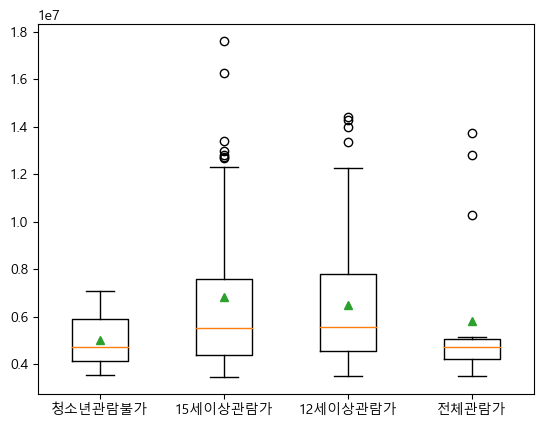

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot([adult, notkid, kid, allage], labels=['청소년관람불가', '15세이상관람가', '12세이상관람가', '전체관람가'], showmeans=True)

<AxesSubplot:xlabel='영상등급', ylabel='누적관객수'>

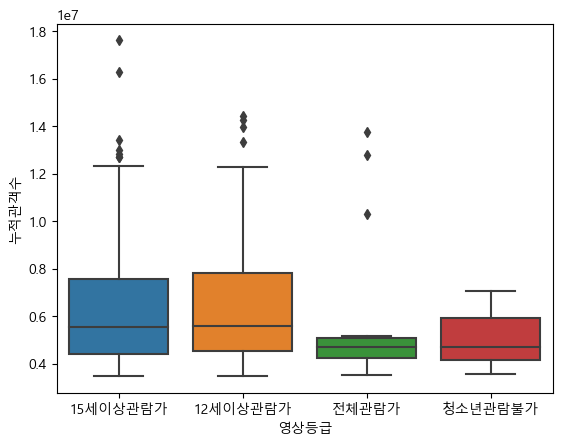

In [38]:
import seaborn as sns

sns.boxplot(x='영상등급', y='누적관객수', data=sample2)



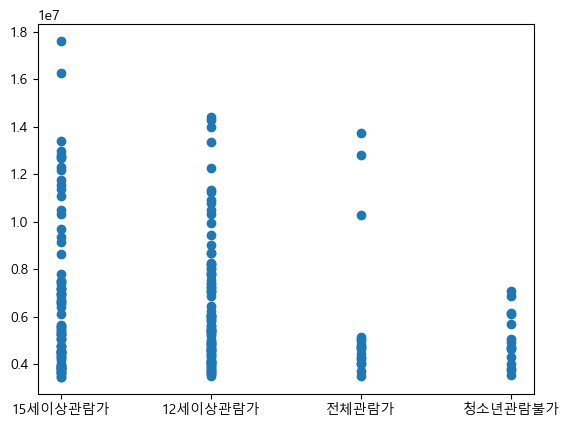

In [40]:
plt.scatter(x='영상등급', y='누적관객수', data=sample2)

<AxesSubplot:xlabel='영상등급', ylabel='누적관객수'>

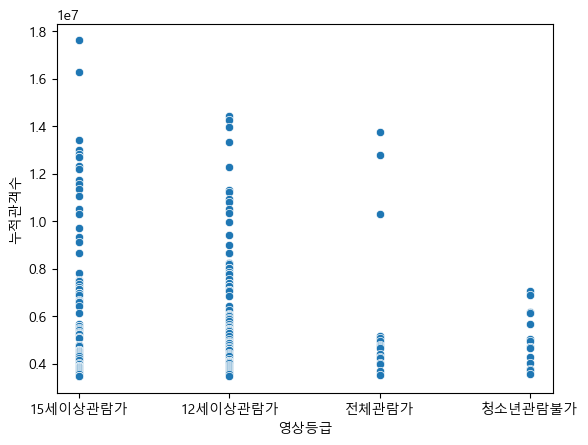

In [41]:
sns.scatterplot(x='영상등급', y='누적관객수', data=sample2)

### ANOVA(One Way Test)

In [43]:
import scipy.stats as stats

F_statistic, pVal = stats.f_oneway(adult, notkid, kid, allage)

print('ANOVA 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value가 충분히 작기 때문에 그룹 평균값이 통계적으로 유의하게 차이납니다.')

ANOVA 결과 : F=1.9, p=0.13325


## 사후 분석

In [45]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

comp = MultiComparison(sample2['누적관객수'], sample2['영상등급'])

### 본페로니

In [46]:
result = comp.allpairtest(stats.ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
12세이상관람가,15세이상관람가,-0.6924,0.4897,1.0,False
12세이상관람가,전체관람가,0.9065,0.3668,1.0,False
12세이상관람가,청소년관람불가,2.0771,0.0403,0.242,False
15세이상관람가,전체관람가,1.1327,0.2602,1.0,False
15세이상관람가,청소년관람불가,2.0868,0.0396,0.2378,False
전체관람가,청소년관람불가,0.9284,0.3606,1.0,False


### Tuckey's HSD

In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(sample2['누적관객수'], sample2['영상등급'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
12세이상관람가,15세이상관람가,318741.1545,0.8929,-843830.1851,1481312.4942,False
12세이상관람가,전체관람가,-665519.244,0.8229,-2659312.6428,1328274.1548,False
12세이상관람가,청소년관람불가,-1469148.0871,0.2713,-3571391.2454,633095.0712,False
15세이상관람가,전체관람가,-984260.3985,0.5838,-2994129.2237,1025608.4266,False
15세이상관람가,청소년관람불가,-1787889.2417,0.1302,-3905384.6664,329606.1831,False
전체관람가,청소년관람불가,-803628.8431,0.863,-3469604.6253,1862346.939,False


In [19]:
from scipy import stats

## 가설 검정

- 귀무가설 : 표본 사이에 통계적으로 의미가 없다고 예상되는 가설
- 대립가설 : 표본 사이에 통계적인 차이가 있다는 가설

### t - test
p는 표본 데이터의 유의확률이며 t값을 통해 계산됩니다. 그리고 유의수준의 기준은

p<.05, p<.01, p<.001 3가지가 있으며 숫자가 작을수록 더 엄격한 수준으로 봅니다.

이러한 유의확률과 유의수준을 비교하여,

유의확률 p가 유의수준에 비해 더 크면 비유의적이라고 하며, 귀무가설(null hypothesis)이

채택되고 대립가설(alternative hypothesis)이 기각되었다고 합니다.

반대로 유의확률p가 유의수준에 비해 더 작으면 유의적이라고 하며, 귀무가설이 기각되고

대립가설이 채택되었다고 합니다. 두 집단 간의 평균이 차이가 '있다'고 해석할 수 있습니다.

In [25]:
t, pvalue = stats.ttest_ind(sample2["누적관객수"], sample2["등급별평균관객수"])
print(t, pvalue)

2.1706402147825348e-06 0.9999982691672324


### 만약 정규분포가 아니라면???

- 순열 검정 : 모집단의 분포가 정규분포를 따르지 않거나 모집단의 분포를 알 수 없을 때 사용하는 방법
- 모집단의 파라미터를 추정하지 않기 때문에 비모수검정 방법중에 하나

In [26]:
def statistic(x,y):
    return np.mean(x) - np.mean(y)

In [27]:
res = stats.permutation_test((sample2["누적관객수"], sample2["등급별평균관객수"]), statistic, random_state=42)

In [28]:
print(res.statistic, res.pvalue)

0.4550000000745058 0.995


### 상관관계 분석

#### 피어슨의 상관관계분석

In [29]:
import matplotlib.pyplot as plt

In [38]:
corr = np.corrcoef(sample2['등급별평균관객수'], sample2['누적관객수'])[0, 1]
print(f"P-value: {corr}")

P-value: 0.16750047932605214


- 정규분포가 아니라서 피어슨은 의미가 없다

#### 스피어맨의 상관관계분석

In [32]:
from scipy.stats import spearmanr

In [33]:
correlation, p_value = spearmanr(sample2['누적관객수'], sample2['등급별평균관객수'])
print(f"Spearman correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman correlation coefficient: 0.119013279345176
P-value: 0.09324501939154789


#### 켄달의 상관관계분석

In [34]:
from scipy.stats import kendalltau

In [35]:

corr, p_value = kendalltau(sample2['누적관객수'], sample2['등급별평균관객수'])
print("Kendall correlation coefficient: ", corr)
print("p-value: ", p_value)

Kendall correlation coefficient:  0.09263619090708287
p-value:  0.09144673105008191
